In [3]:
%pip install python-gnupg
%pip install eep153_tools
!pip install -r requirements.txt

  Using cached python_gnupg-0.5.2-py2.py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached CFEDemands-0.6.1-py2.py3-none-any.whl (45 kB)
  Using cached ConsumerDemands-0.4.2.dev0-py2.py3-none-any.whl (12 kB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached ray-2.10.0-cp39-cp39-manylinux2014_x86_64.whl (65.1 MB)
  Using cached dvc-3.49.0-py3-none-any.whl (450 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached celery-5.3.6-py3-none-any.whl (422 kB)
  Using cached dpath-2.1.6-py3-none-any.whl (17 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
  Using cached iterative_telemetry-0.0.8-py3-none-any.whl (10 kB)
  Using cached pygtrie-2.5.0-py3-none-any.whl (25 kB)
  Using cached dvc_render-1.0.1-py

In [4]:
%pip install gspread

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install gspread_pandas

Note: you may need to restart the kernel to use updated packages.


<h2>[A] Getting the Data</h2>

In [6]:
from eep153_tools.sheets import read_sheets

url = 'https://docs.google.com/spreadsheets/d/1Ny8WWqxuPHirwHriHKNTCqG4l5V3GLQ4O6NIuGV1v_A/'

senegal_expenditures = read_sheets(url,sheet='Food Expenditures',nheaders=1)
senegal_expenditures.head()

,i,t,m,"Abats et tripes (foie, rognon, etc.)",Ail,Ananas,Arachide grillée,Arachides décortiquées ou pilées (noflaye),Arachides fraîches en coques,Arachides séchées en coques,...,Tomate fraîche,Tomate séchée,Viande d'autres volailles domestiques,Viande de b__uf,Viande de chameau,Viande de chèvre,Viande de mouton,Viande de porc,Viande de poulet,Vinaigre /moutarde
0,11011,2018,ziguinchor,NaN,600.0,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,110110,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110111,2018,ziguinchor,NaN,NaN,NaN,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110112,2018,ziguinchor,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,50.0
4,11012,2018,ziguinchor,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
senegal_hh = read_sheets(url,sheet='Household Characteristics',nheaders=1)
senegal_hh.head()

,i,t,m,women,men,boys,girls,Males 00-03,Females 00-03,Males 04-08,...,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
0,11011,2018,ziguinchor,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000000,1
1,110110,2018,ziguinchor,1,1,1,1,0,0,0,...,0,1,1,0,0,1,0,0,1.386294,1
2,110111,2018,ziguinchor,0,2,2,0,0,0,0,...,2,0,1,0,1,0,0,0,1.386294,1
3,110112,2018,ziguinchor,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.693147,1
4,11012,2018,ziguinchor,2,2,2,4,0,0,0,...,1,2,1,1,0,1,1,0,2.302585,1


# Place Holder

In [8]:
import pandas as pd
def clean_multiindex_df(df):
    # If the columns are a MultiIndex, join them with an underscore, otherwise just strip them
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns.values]
    else:
        df.columns = [col.strip() for col in df.columns.tolist()]

    # Remove duplicated columns
    df = df.loc[:, ~df.columns.duplicated(keep='first')]

    # Drop columns that start with 'Unnamed'
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    # Remove duplicated rows
    df = df.loc[~df.index.duplicated(), :]

    return df

# Clean the DataFrames with MultiIndex columns
z_cleaned = clean_multiindex_df(senegal_hh)
x_cleaned = clean_multiindex_df(senegal_expenditures)


In [9]:
x = senegal_expenditures

In [10]:
x.head()

,i,t,m,"Abats et tripes (foie, rognon, etc.)",Ail,Ananas,Arachide grillée,Arachides décortiquées ou pilées (noflaye),Arachides fraîches en coques,Arachides séchées en coques,...,Tomate fraîche,Tomate séchée,Viande d'autres volailles domestiques,Viande de b__uf,Viande de chameau,Viande de chèvre,Viande de mouton,Viande de porc,Viande de poulet,Vinaigre /moutarde
0,11011,2018,ziguinchor,NaN,600.0,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,110110,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110111,2018,ziguinchor,NaN,NaN,NaN,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110112,2018,ziguinchor,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,50.0
4,11012,2018,ziguinchor,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import numpy as np
if 'm' not in x.columns:
    x_cleaned['m'] = 1

x = x_cleaned.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

,,j,"Abats et tripes (foie, rognon, etc.)",Ail,Ananas,Arachide grillée,Arachides décortiquées ou pilées (noflaye),Arachides fraîches en coques,Arachides séchées en coques,"Arôme (Maggi, Jumbo, etc.)",Attiéke,"Aubergine, Courge/Courgette",...,Tomate fraîche,Tomate séchée,Viande d'autres volailles domestiques,Viande de b__uf,Viande de chameau,Viande de chèvre,Viande de mouton,Viande de porc,Viande de poulet,Vinaigre /moutarde
i,t,m,,,,,,,,,,,,,,,,,,,,,
11011,2018,ziguinchor,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
110110,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110111,2018,ziguinchor,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110112,2018,ziguinchor,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,50.0
11012,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2019,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2986,2019,ziguinchor,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,...,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.0,500.0
2987,2019,ziguinchor,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.0,500.0


In [12]:
# Get HH characteristics...
z = z_cleaned
if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'j'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

,,j,women,men,boys,girls,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,1
110110,2018,ziguinchor,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.386294,1
110111,2018,ziguinchor,0,2,2,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,1.386294,1
110112,2018,ziguinchor,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.693147,1
11012,2018,ziguinchor,2,2,2,4,0,0,0,1,1,1,1,2,1,1,0,1,1,0,2.302585,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2019,ziguinchor,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,1
2986,2019,ziguinchor,5,1,1,5,0,0,0,2,1,0,0,4,0,3,0,1,1,0,2.484907,1
2987,2019,ziguinchor,1,4,2,0,0,0,1,0,1,0,0,0,3,0,0,1,1,0,1.945910,1


<h2>[A] Estimating Demand</h2>

In [13]:
import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

result.get_beta().sort_values(ascending=False)

j
Huile de soja / végétale (e.g., Ninaal, Jaara, etc.)                   3.488494
Oignon frais                                                           2.844978
Riz local brisé                                                        2.838873
Lait en poudre                                                         2.763832
Mayonnaise                                                             2.703856
                                                                         ...   
Feuilles d'oseille (bissap)                                            0.789731
Autres tisanes et infusions n.d.a. (quinquelibat, citronelle, etc.)    0.761179
Poisson frais yaboy ou obo (sardinelle)                                0.740047
Pain moderne                                                           0.493078
Salade (laitue, batavia, etc.)                                         0.489491
Name: beta, Length: 63, dtype: float64

In [14]:
result.to_pickle('./foo.pickle')
result = cfe.read_pickle('foo.pickle')

In [15]:
from cfe import regression as rgsn
import numpy as np

r = rgsn.read_pickle('foo.pickle')
xhat = result.predicted_expenditures()
p = np.exp(r.get_Ar())

In [16]:
p.tail(20)

t     m           j                                      
2019  ziguinchor  Piment                                     0.821146
                  Poisson frais thiof/seudd (baracouda)      0.557693
                  Poisson frais yaboy ou obo (sardinelle)    1.039133
                  Poisson fumé kétiakh (sardinelle)          1.091018
                  Poisson séché (tambadiang, kong, etc.)     1.394830
                  Poivron frais                              0.943569
                  Pomme de terre                             1.110161
                  Pâte d'arachide                            1.093410
                  Pâtes alimentaires                         0.982618
                  Riz local brisé                            1.259895
                  Riz local entier                           4.290414
                  Salade (laitue, batavia, etc.)             1.207051
                  Sel                                        0.796804
                  Soumbala (nete

Text(0.5, 0, 'Quantities of Viande de b__uf Demanded')

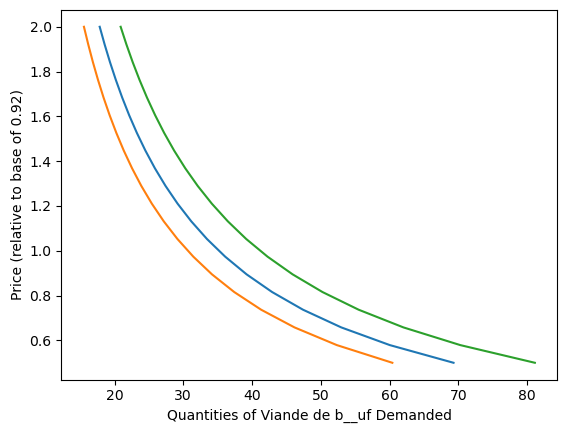

In [17]:
import matplotlib.pyplot as plt

use = 'Viande de b__uf'  # Good we want demand curve for

scale = np.linspace(.5,2,20)

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices
pbar = p.xs(2019, level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j='Viande de b__uf'):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p


# Demand for Millet for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

In [18]:
r.demands(20000,pbar).index.tolist()

['Ail',
 'Arachides décortiquées ou pilées (noflaye)',
 'Arôme (Maggi, Jumbo, etc.)',
 'Aubergine, Courge/Courgette',
 'Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)',
 'Autres condiments (poivre etc.)',
 'Autres poissons frais (dorade, youfoufe, rouger, sikette, etc.)',
 'Autres poissons fumés (kong fumé, yaboy ou obo fumé)',
 'Autres tisanes et infusions n.d.a. (quinquelibat, citronelle, etc.)',
 'Banane douce',
 'Beignets, galettes',
 'Beurre',
 'Biscuits',
 'Boissons gazeuses (coca, etc.)',
 'Café',
 'Caramel, bonbons, confiseries, etc',
 'Carotte',
 'Chocolat à croquer, pâte à tartiner',
 'Choux',
 'Citrons',
 'Concentré de tomate',
 'Concombre',
 'Cube alimentaire (Maggi, Jumbo, )',
 "Feuilles d'oseille (bissap)",
 'Feuilles de baobab (lalo)',
 'Gingembre',
 'Gombo frais',
 'Huile de palme rouge',
 'Huile de soja / végétale (e.g., Ninaal, Jaara, etc.)',
 'Jus de fruits (orange, bissap, gingembre, jus de cajou,etc.)',
 'Lait caillé, yaourt',
 'Lait en poudre'

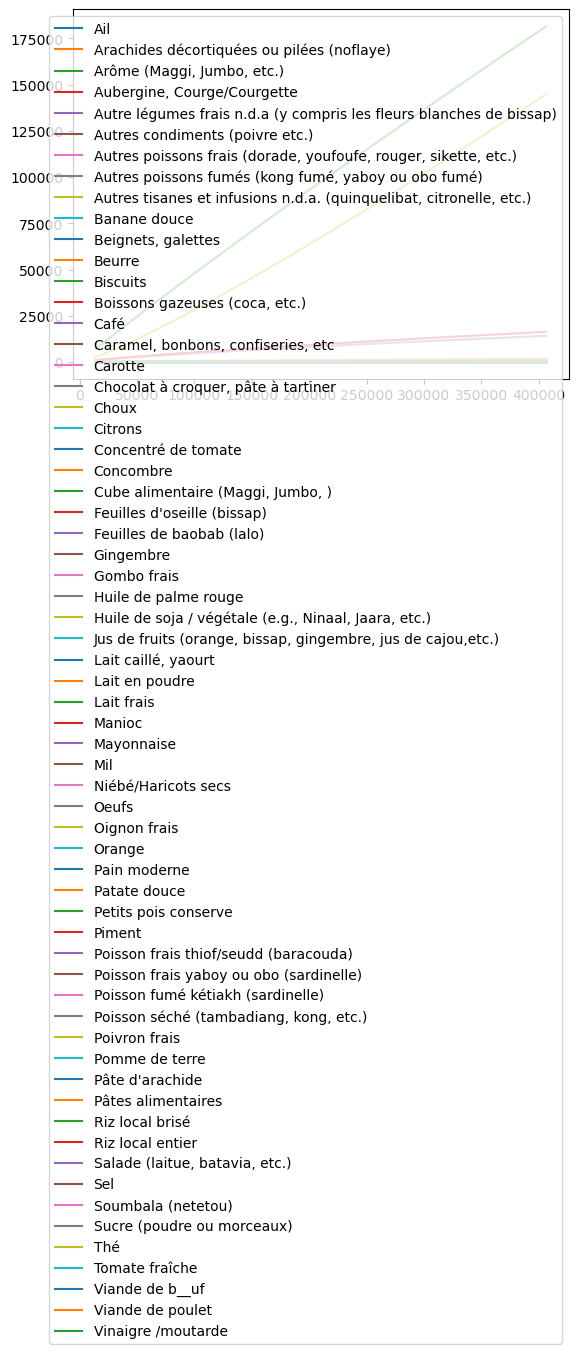

In [19]:
fig,ax = plt.subplots()

X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),50)

ax.plot(X,[r.demands(x,pbar) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())

<Axes: xlabel='yhat', ylabel='y'>

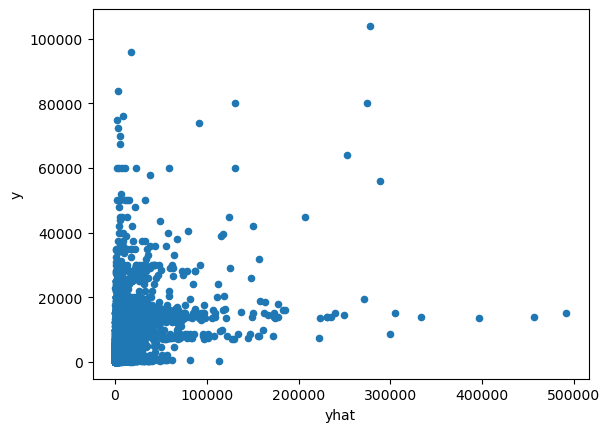

In [20]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(z,min_obs=17)
use = y.index.intersection(x.index)

y = y.loc[use,:]

d = x
d = x.loc[use,:]
y = y.stack()

d = d.stack()

df = pd.DataFrame({'y':d,'yhat':xhat})
df.plot.scatter(x='yhat',y='y')

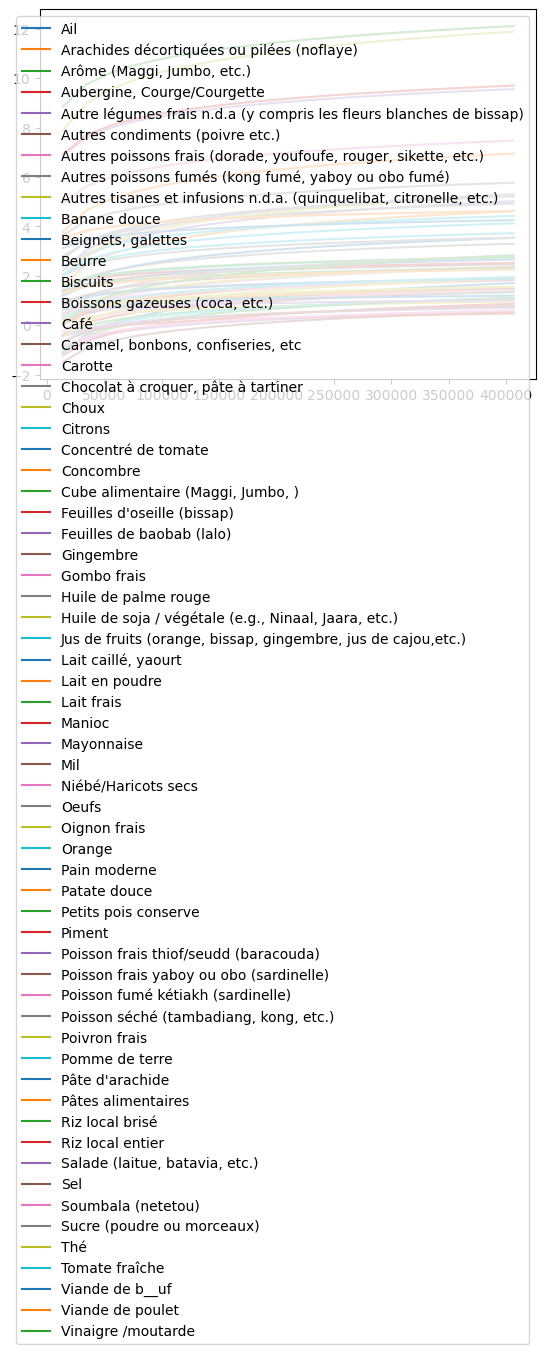

In [21]:
fig,ax = plt.subplots()

X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

ax.plot(X,[np.log(r.demands(x,pbar)) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())


## Relative Income Elasticity


In [22]:
result.get_beta().sort_values()

j
Salade (laitue, batavia, etc.)                                         0.489491
Pain moderne                                                           0.493078
Poisson frais yaboy ou obo (sardinelle)                                0.740047
Autres tisanes et infusions n.d.a. (quinquelibat, citronelle, etc.)    0.761179
Feuilles d'oseille (bissap)                                            0.789731
                                                                         ...   
Mayonnaise                                                             2.703856
Lait en poudre                                                         2.763832
Riz local brisé                                                        2.838873
Oignon frais                                                           2.844978
Huile de soja / végétale (e.g., Ninaal, Jaara, etc.)                   3.488494
Name: beta, Length: 63, dtype: float64

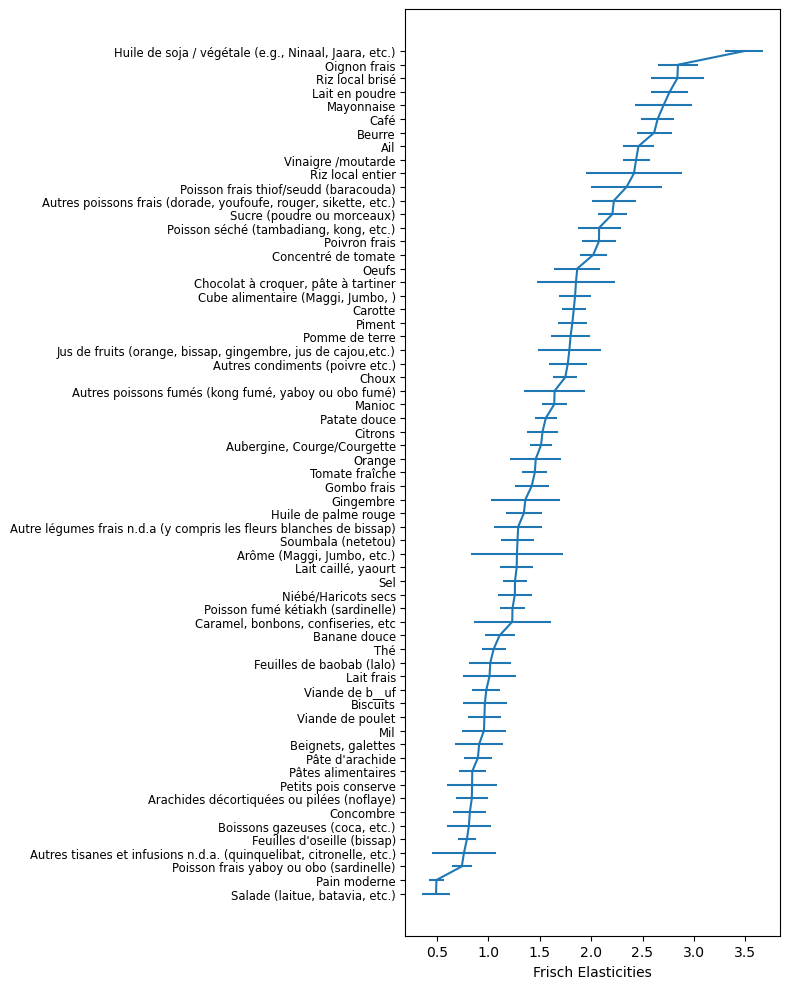

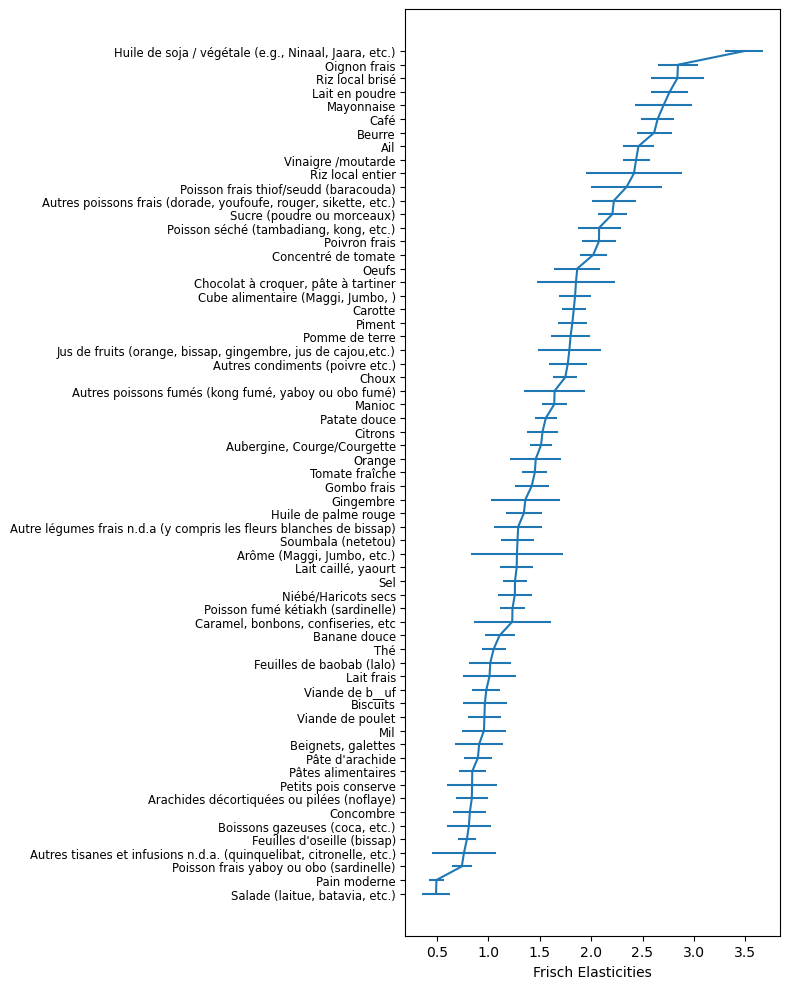

In [23]:
result.graph_beta()

In [24]:
result.gamma

k,women,men,boys,girls,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,...,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,,,,,
Ail,0.379580,-0.047160,-0.027071,0.266756,-0.016813,-0.287471,0.033626,-0.289684,0.008557,-0.271969,...,-0.300617,0.061704,-0.332593,0.084989,-0.262398,0.106717,-0.277993,-0.090254,-0.219172,4.250916
Arachides décortiquées ou pilées (noflaye),0.056353,-0.088653,-0.122260,0.010631,0.143066,-0.023503,0.181860,0.023911,0.152369,0.050759,...,-0.021734,0.125690,-0.024868,0.156610,0.045195,0.126059,0.021744,-0.097433,0.071866,5.386996
"Arôme (Maggi, Jumbo, etc.)",0.078325,-0.020543,-0.029505,-0.067680,-0.042350,-0.072585,0.010057,0.008031,0.113109,0.023326,...,-0.006342,-0.028617,-0.058547,0.034137,-0.014957,-0.156636,0.135510,-0.023793,-0.095483,4.519929
"Aubergine, Courge/Courgette",0.272629,-0.022345,-0.058965,0.282027,0.067831,-0.272986,0.084884,-0.288100,0.078071,-0.279458,...,-0.286872,0.057790,-0.228292,0.061390,-0.202272,0.121137,-0.202259,-0.048659,0.048320,4.521948
Autre légumes frais n.d.a (y compris les fleurs blanches de bissap),0.500795,0.135875,-0.055087,0.523054,0.063124,-0.530550,0.007304,-0.579160,0.032224,-0.454741,...,-0.484362,-0.092361,-0.505956,-0.018430,-0.465120,0.104242,-0.504508,-0.047474,-0.025214,4.242963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thé,0.433567,-0.058668,-0.066294,0.420416,0.053202,-0.399582,0.083981,-0.395471,0.061069,-0.400522,...,-0.440317,0.075711,-0.433679,0.106749,-0.395877,0.122399,-0.424634,-0.041866,0.099512,5.054976
Tomate fraîche,0.370545,-0.241142,-0.286064,0.289398,0.299656,-0.287270,0.266339,-0.297048,0.272870,-0.278808,...,-0.302394,0.248168,-0.339010,0.327300,-0.279392,0.336512,-0.289130,-0.137289,-0.115716,4.864661
Viande de b__uf,0.197222,0.031905,-0.003248,0.160431,-0.030703,-0.195564,-0.010431,-0.190993,-0.018416,-0.155114,...,-0.176453,-0.024518,-0.164825,0.024636,-0.120707,0.062711,-0.142924,0.089215,0.146448,7.855882


## Calculating Nurtition

In [25]:
import cfe

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [26]:
use = qhat.columns

nutrients = qhat[use]
nutrients.mean()

t     m            j                                                                  
2018  SAINT-LOUIS  Ail                                                                     131.072559
                   Arachides décortiquées ou pilées (noflaye)                              239.880065
                   Arôme (Maggi, Jumbo, etc.)                                              276.223243
                   Aubergine, Courge/Courgette                                             129.010089
                   Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)     102.092788
                                                                                             ...     
2019  ziguinchor   Thé                                                                     204.973823
                   Tomate fraîche                                                          146.697178
                   Viande de b__uf                                                        2213.29

In [27]:
nutrients.describe()

t             2018                                             \
m      SAINT-LOUIS                                              
j              Ail Arachides décortiquées ou pilées (noflaye)   
count  5959.000000                                5959.000000   
mean    131.072559                                 239.880065   
std     161.495214                                 123.304528   
min      13.577404                                  67.791418   
25%      54.070277                                 165.670414   
50%      83.139242                                 213.151302   
75%     141.032838                                 279.328157   
max    2677.035674                                1948.618715   

t                                                             \
m                                                              
j     Arôme (Maggi, Jumbo, etc.) Aubergine, Courge/Courgette   
count                5959.000000                 5959.000000   
mean                  276.223243                  129.010089   
std                   278.959357                   77.941525   
min                    21.319245                   34.883875   
25%                   109.895514                   79.877809   
50%                   180.616548                  108.255212   
75%                   325.862139                  151.539373   
max                  3278.555230                  934.159624   

t                                                                          \
m                                                                           
j     Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)   
count                                        5959.000000                    
mean                                          102.092788                    
std                                           151.456947                    
min                                            14.845570                    
25%                                            48.570326                    
50%                                            69.195905                    
75%                                           100.398478                    
max                                          2075.405227                    

t                                      \
m                                       
j     Autres condiments (poivre etc.)   
count                     5959.000000   
mean                        85.219314   
std                         63.905667   
min                         16.235268   
25%                         47.328341   
50%                         66.603367   
75%                         99.063536   
max                        774.719571   

t                                                                      \
m                                                                       
j     Autres poissons frais (dorade, youfoufe, rouger, sikette, etc.)   
count                                        5959.000000                
mean                                         1242.405912                
std                                          1415.880607                
min                                           125.561250                
25%                                           513.594501                
50%                                           822.958165                
75%                                          1409.043010                
max                                         18529.469763                

t                                                           \
m                                                            
j     Autres poissons fumés (kong fumé, yaboy ou obo fumé)   
count                                        5959.000000     
mean                                          619.194216     
std                                           670.385613     
min                                            49.411817     
25%                                      

In [28]:
merged_df = x.merge(z, left_index=True, right_index=True, how='inner')

In [29]:
merged_df.head()

,,j,"Abats et tripes (foie, rognon, etc.)",Ail,Ananas,Arachide grillée,Arachides décortiquées ou pilées (noflaye),Arachides fraîches en coques,Arachides séchées en coques,"Arôme (Maggi, Jumbo, etc.)",Attiéke,"Aubergine, Courge/Courgette",...,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural
i,t,m,,,,,,,,,,,,,,,,,,,,,
11011,2018,ziguinchor,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0.000000,1
110110,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,1,0,0,1.386294,1
110111,2018,ziguinchor,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,1,0,1,0,0,0,1.386294,1
110112,2018,ziguinchor,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0.693147,1
11012,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1,1,0,1,1,0,2.302585,1


In [37]:
merged_df['total_people'] = merged_df['women'] + merged_df['men'] + merged_df['boys'] + merged_df['girls']

In [38]:
average_expenditure = merged_df.groupby('total_people')['Viande de b__uf'].mean()

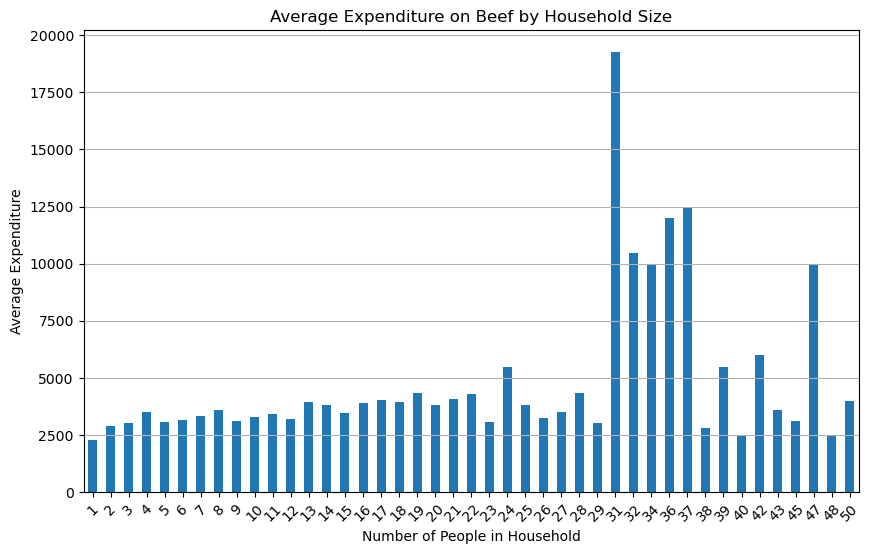

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
average_expenditure.plot(kind='bar')
plt.title('Average Expenditure on Beef by Household Size')
plt.xlabel('Number of People in Household')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

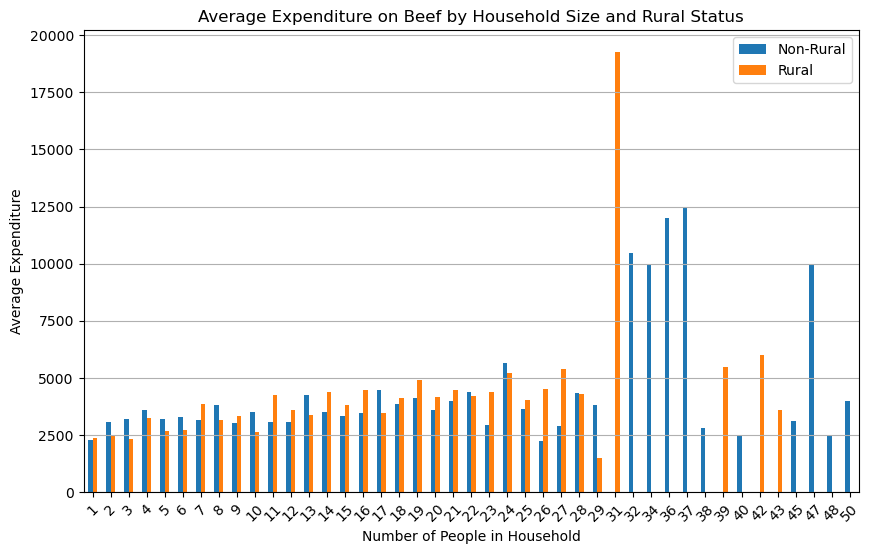

In [40]:
# Group by both 'Rural' status and 'total_people', then calculate average expenditure
average_expenditure_by_rural = merged_df.groupby(['Rural', 'total_people'])['Viande de b__uf'].mean().unstack(level=0)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting each rural status separately
average_expenditure_by_rural.plot(kind='bar', figsize=(10, 6))
plt.title('Average Expenditure on Beef by Household Size and Rural Status')
plt.xlabel('Number of People in Household')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=45)
plt.legend(['Non-Rural', 'Rural'])
plt.grid(axis='y')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

In [42]:
merged_df_cleaned = merged_df[merged_df['Viande de b__uf'].notna()]

In [43]:
merged_df_cleaned.head()

,,j,"Abats et tripes (foie, rognon, etc.)",Ail,Ananas,Arachide grillée,Arachides décortiquées ou pilées (noflaye),Arachides fraîches en coques,Arachides séchées en coques,"Arôme (Maggi, Jumbo, etc.)",Attiéke,"Aubergine, Courge/Courgette",...,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize,Rural,total_people
i,t,m,,,,,,,,,,,,,,,,,,,,,
11011,2018,ziguinchor,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0.000000,1,1
110112,2018,ziguinchor,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0.693147,1,2
11013,2018,ziguinchor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,0,0,1,1,0,0,0,1.791759,1,6
11015,2018,ziguinchor,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,1,1,0,0,1.945910,1,7
11017,2018,ziguinchor,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,0,0,0,0,0,1.791759,1,6


In [49]:
# Calculate the IQR for 'Viande de b__uf'
Q1 = merged_df_example['Viande de b__uf'].quantile(0.25)
Q3 = merged_df_example['Viande de b__uf'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
merged_df_filtered = merged_df_example[(merged_df_example['Viande de b__uf'] >= lower_bound) & (merged_df_example['Viande de b__uf'] <= upper_bound)]

NameError: name 'merged_df_example' is not defined

In [44]:
# Independent variable (X) and dependent variable (y)
X = merged_df_cleaned[['Viande de b__uf']]  # Independent variable
y = merged_df_cleaned['log HSize']  # Dependent variable

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predictions for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_range = reg.predict(X_range)

/srv/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


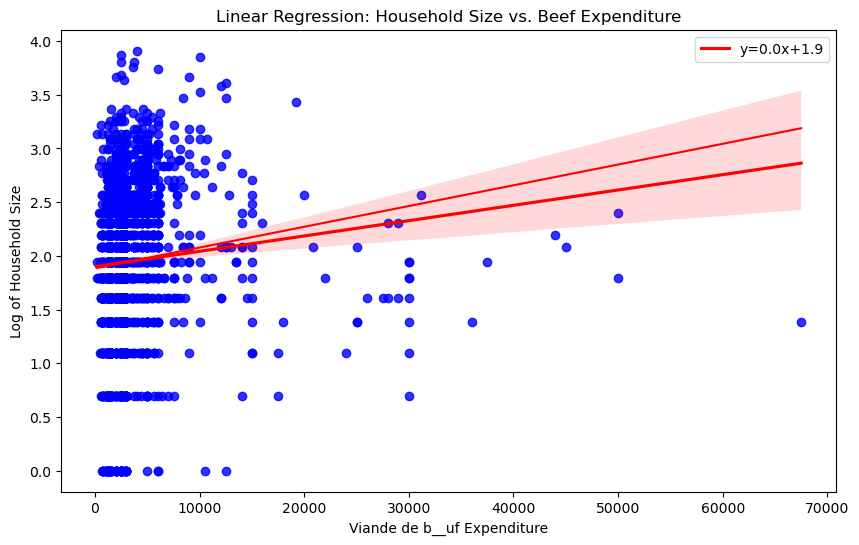

In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=merged_df_cleaned['Viande de b__uf'], y=merged_df_cleaned['log HSize'], ci=95, scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'label':"y={0:.1f}x+{1:.1f}".format(reg.coef_[0], reg.intercept_)})
plt.plot(X_range, y_pred_range, color='red')
plt.xlabel('Viande de b__uf Expenditure')
plt.ylabel('Log of Household Size')
plt.title('Linear Regression: Household Size vs. Beef Expenditure')
plt.legend()
plt.show()

In [48]:
(reg.coef_[0], reg.intercept_), mean_squared_error(y_test, reg.predict(X_test)), r2_score(y_test, reg.predict(X_test))

((1.9323622800961164e-05, 1.884414528838028),
 0.44274650891516304,
 -0.010583821082089884)